# EDA

## Imports

In [175]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Load the data

In [176]:
df = pd.read_csv("datasets/after_data_wrangling.csv")
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Datetime break down
**NOTE:**
- Here, we create a separate dataframe where we breakdown the date field into sub-components for date.
- This includes year, month and weekday.

In [177]:
date_df = df[["date"]]
df.drop("date", axis=1, inplace=True)
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [178]:
date_df.head()

,date
0,05-02-2010
1,12-02-2010
2,19-02-2010
3,26-02-2010
4,05-03-2010


In [179]:
# pd.to_datetime(date_df["date"], dayfirst=True)
date_df["date"] = pd.to_datetime(date_df["date"], format="%d-%m-%Y")
date_df.head()

,date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05


In [180]:
date_df["weekday"] = date_df.date.dt.weekday
date_df["month"] = date_df.date.dt.month
date_df["year"] = date_df.date.dt.year
date_df.head()

,date,weekday,month,year
0,2010-02-05,4,2,2010
1,2010-02-12,4,2,2010
2,2010-02-19,4,2,2010
3,2010-02-26,4,2,2010
4,2010-03-05,4,3,2010


In [181]:
date_df["weekday"].value_counts()

4    6435
Name: weekday, dtype: int64

- Here, we see that all the data was taken on Fridays (weekday 4).
- This can be dropped later if needed.

## Feature break down

In [182]:
# Obtaining a list of features separate from the target feature
target = "weekly_sales"
features = [i for i in df.columns if i != target]
display(len(features), features)

6

['store', 'holiday_flag', 'temperature', 'fuel_price', 'cpi', 'unemployment']

In [183]:
# Checking number of unique values in each feature
n_unique_per_column = df.nunique().sort_values()
n_unique_per_column

holiday_flag       2
store             45
unemployment     349
fuel_price       892
cpi             2145
temperature     3528
weekly_sales    6435
dtype: int64

In [184]:
# Numerical & Categorical features
numeric_feat = []
cat_feat = []

for feature in features:
    if n_unique_per_column[feature] <= 45:
        cat_feat.append(feature)
    else:
        numeric_feat.append(feature)

print(f"There are {len(numeric_feat)} numerical and {len(cat_feat)} categorical features.\n")

for feature in numeric_feat:
    coef = np.corrcoef(df[feature], df["weekly_sales"])
    print(f"The correlation coefficient between weekly sales and {feature} is {coef[0][1]}")

There are 4 numerical and 2 categorical features.

The correlation coefficient between weekly sales and temperature is -0.06381001317946958
The correlation coefficient between weekly sales and fuel_price is 0.009463786314475132
The correlation coefficient between weekly sales and cpi is -0.07263416204017625
The correlation coefficient between weekly sales and unemployment is -0.10617608965795416


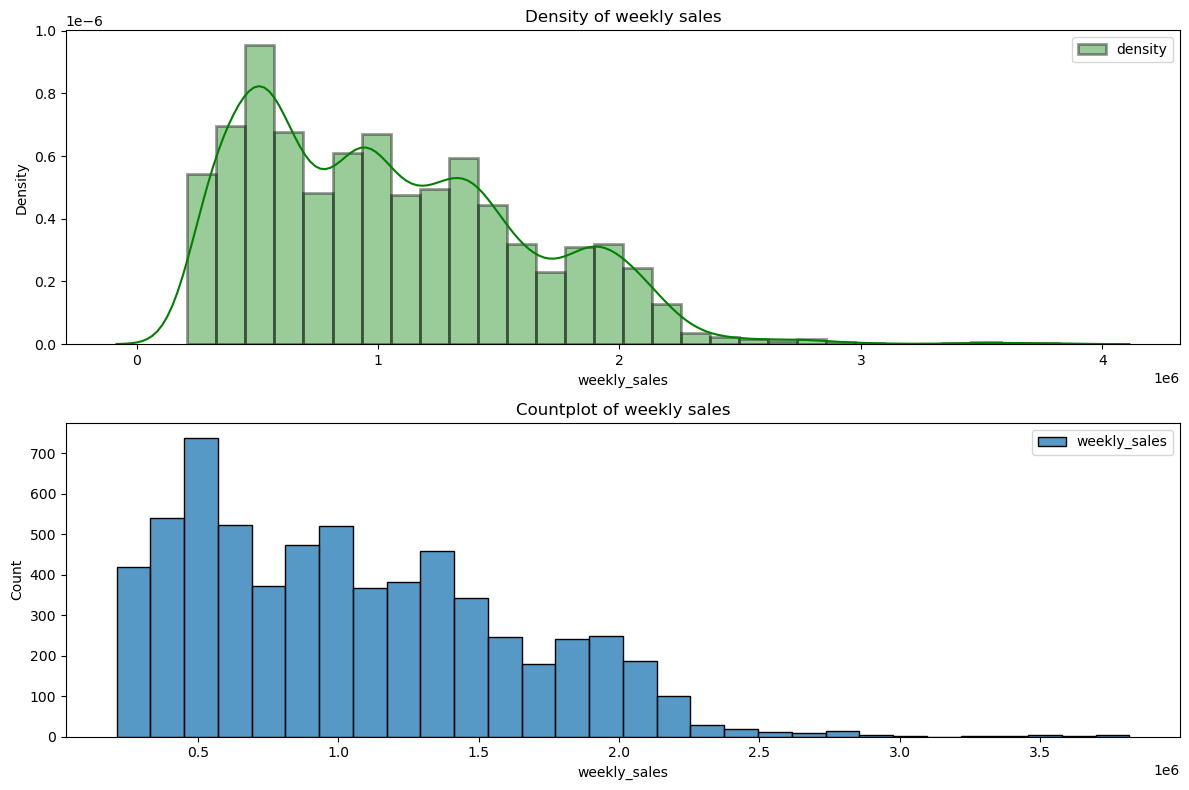

In [185]:
# Distribution of the target feature
fig, axes = plt.subplots(2, 1, figsize=(12,8))

sns.distplot(df[target],ax=axes[0],color="g", hist_kws=dict(edgecolor="black", linewidth=2), bins=30, label="density")
axes[0].set_title("Density of weekly sales")
axes[0].legend(loc="upper right")

sns.histplot(data=df[target], ax=axes[1], bins=30, label="weekly_sales")
axes[1].set_title("Countplot of weekly sales")
axes[1].legend(loc="upper right")

plt.legend()
plt.tight_layout()
plt.show()

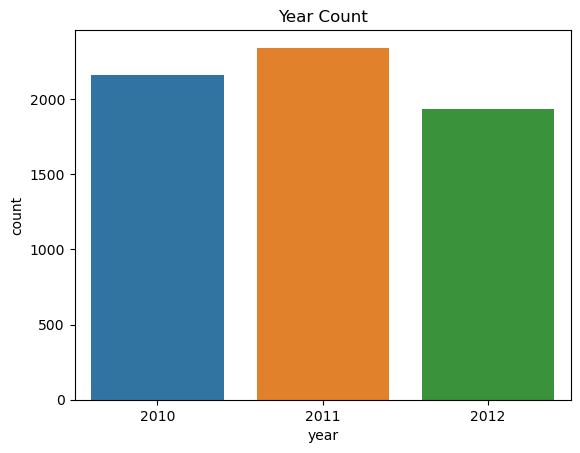

In [186]:
# Count of the year feature
sns.countplot(x ="year", data=date_df).set(title="Year Count")
plt.show()

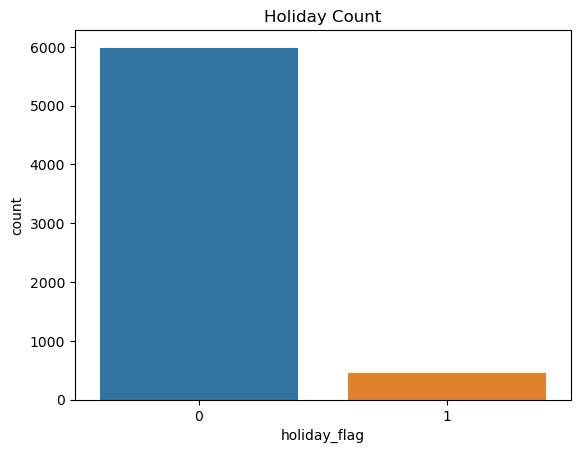

In [187]:
# Count of the holiday flag feature
sns.countplot(x ="holiday_flag",data=df).set(title="Holiday Count")
plt.show()

## Numeric features

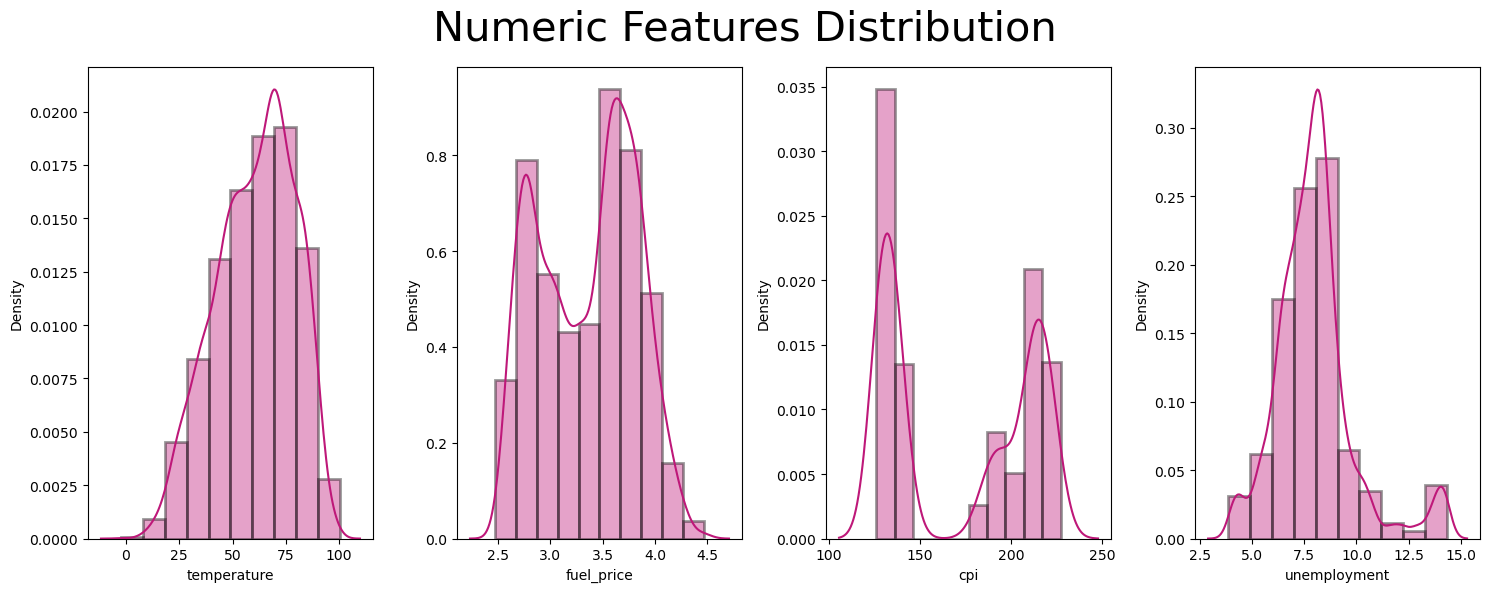

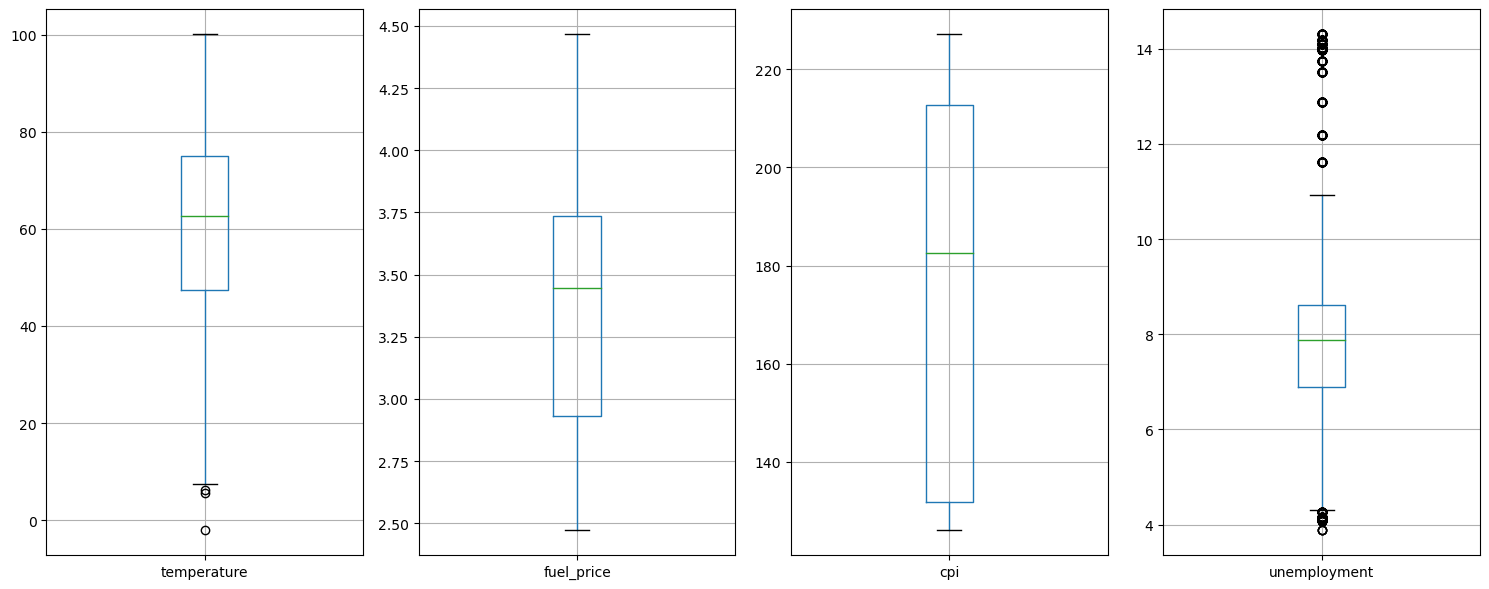

In [188]:
# Numeric features
n_col_fig = 4
n_row_fig = math.ceil(len(numeric_feat)/n_col_fig)

fig = plt.figure(figsize=[15, 6 * n_row_fig])
fig.suptitle("Numeric Features Distribution", size=30)

color = list(np.random.randint([255,255,255])/255)

for i in range(len(numeric_feat)):
    plt.subplot(n_row_fig, n_col_fig, i+1)
    sns.distplot(df[numeric_feat[i]],hist_kws=dict(edgecolor="black",linewidth=2),bins=10,color=color)
plt.tight_layout()
plt.show()

plt.figure(figsize=[15, 6 * n_row_fig])

for i in range(len(numeric_feat)):
    plt.subplot(n_row_fig, n_col_fig, i+1)
    df.boxplot(numeric_feat[i])
    plt.tight_layout()

plt.show()

## Pairplot

In [189]:
# # Understanding the relationship between all the features
# g = sns.pairplot(df)
# plt.title("Pairplots for all features")
# g.map_upper(sns.kdeplot,levels=4,color=".2")
# plt.show()

**Note:**
- This pairplot takes a significant amount of time to run so it was run once then saved as an image which is referenced in the output below.

**Output:**
![Pairplot](raw_data/pairplot.png)

## Steps to consider further

These are some further steps to consider:
- Find and store various summary statistics
- Perform PCA on features
- Create custom features and drop pre-existing features
- Check repeatability/consistency/regularity of reported dates
- Obtain feature correlation heatmap
- Get scatterplots of numeric features against weekly_sales
- Make time series plots and check for any correlation

## Saving data

In [190]:
merged_df = pd.concat([df, date_df], axis=1)
merged_df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,date,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,4,3,2010


In [191]:
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [192]:
date_df.head()

,date,weekday,month,year
0,2010-02-05,4,2,2010
1,2010-02-12,4,2,2010
2,2010-02-19,4,2,2010
3,2010-02-26,4,2,2010
4,2010-03-05,4,3,2010


**NOTE:**
- The code below can be un-commented if saving is required.

In [193]:
from library.sb_utils import save_file
save_file(df, "after_eda_no_date.csv", "datasets")
save_file(date_df, "after_eda_date.csv", "datasets")
save_file(merged_df, "after_eda_merged.csv", "datasets")

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\after_eda_no_date.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\after_eda_date.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\after_eda_merged.csv"
